## Classification problem using logistic regression and optimization using gradient descent

In [89]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [74]:
data = make_blobs(
    n_samples=2000, n_features=2, centers=2
)
df = pd.DataFrame(np.hstack([data[0], data[1].reshape(2000, 1)]), columns=['f1', 'f2', 'target'])

In [75]:
df.head()

,f1,f2,target
0,-4.024780,10.328957,0.0
1,-2.704482,9.714880,0.0
2,-3.074762,9.810785,0.0
3,0.767406,-4.854355,1.0
4,0.879547,-4.924521,1.0


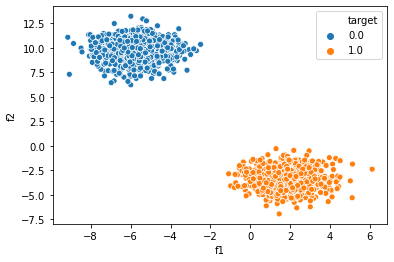

In [76]:
sns.scatterplot('f1', 'f2', data=df, hue='target')

### Equations for hypothesis $h(\theta)$, cost function $J(\theta)$ and changes in parameters $\theta$ for each step and $m$ training examples

\begin{equation}
z(\theta) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 \\
h(\theta) = \frac{1}{1+exp(-z)} \\
J(\theta) = \frac{1}{2m}\sum_{i=0}^{m} [y_i \log h(\theta) - (1-y_i)log(1-h(\theta))] \\
\frac{\partial}{\partial \theta_0} = \frac{exp(-z)}{1+exp(-z)} \\
\frac{\partial}{\partial \theta_1} = \frac{x_1 exp(-z)}{1+exp(-z)} \\
\frac{\partial}{\partial \theta_2} = \frac{x_2 exp(-z)}{1+exp(-z)} \\
per step \\
\theta_0 = \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta) \\
\theta_1 = \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\theta)\\
\theta_2 = \theta_2 - \alpha \frac{\partial}{\partial \theta_2} J(\theta)
\end{equation}

In [125]:
x_train, x_test, y_train, y_test = train_test_split(df[['f1', 'f2']], df['target'])
min_val_x, max_val_x = x_train['f1'].min(), x_train['f1'].max()
min_val_y, max_val_y = x_train['f2'].min(), x_train['f2'].max()

theta_zero, theta_one, theta_two = 0, 0, 0
m = x_train.shape[0]
training_steps = 100
learning_rate = 0.01
cost_vals = []


def sigmoid(num):
    return 1/(1+np.exp(num))

vect_sigmoid = np.vectorize(sigmoid)

for step in range(training_steps):
    x1 = x_train['f1']
    x2 = x_train['f2']
    target = y_train
    z = theta_zero + theta_one*x1 + theta_two*x2
    h = vect_sigmoid(-z)
    cost = (target*np.log(h) - (1-target)*np.log(h)).sum()/(2*m)
    delta_1 = (np.exp(-z)/(1+np.exp(-z))).sum()/(2*m)
    delta_2 = (x1*np.exp(-z)/(1+np.exp(-z))).sum()/(2*m)
    delta_3 = (x2*np.exp(-z)/(1+np.exp(-z))).sum()/(2*m)
    
    theta_zero = theta_zero - learning_rate*delta_1
    theta_one = theta_one - learning_rate*delta_2
    theta_two = theta_two - learning_rate*delta_3
    
    cost_vals.append(cost)

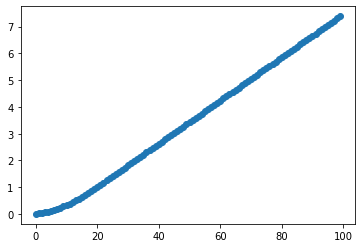

In [126]:
plt.scatter([i for i in range(len(cost_vals))], cost_vals)
plt.show()

In [127]:
test_x1, test_x2 = x_test['f1'], x_test['f2']

z = theta_zero + theta_one*test_x1 + theta_two*test_x2
h = vect_sigmoid(-z)

In [128]:
def make_class(num):
    return 1 if num>=0.5 else 0

vect = np.vectorize(make_class)
predict = vect(h)

In [129]:
accuracy_score(y_test, predict)

1.0

In [130]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       245
         1.0       1.00      1.00      1.00       255

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

